<a href="https://colab.research.google.com/github/sp-au-mu-nl/SpeechComm/blob/main/notebook/chap07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap07.zip
!unzip -o chap07.zip
!rm chap07.zip

--2025-04-23 04:04:07--  https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap07.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap07.zip [following]
--2025-04-23 04:04:08--  https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap07.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1586569 (1.5M) [application/zip]
Saving to: ‘chap07.zip’

chap07.zip          100%[===================>]   1.51M  --.-KB/s    in 0.09s   

2025-04-23 04:04:08 (16.9 MB/s) - ‘chap07.zip’ saved [1586569/1586569]

Archive:  c

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.mixture import GaussianMixture

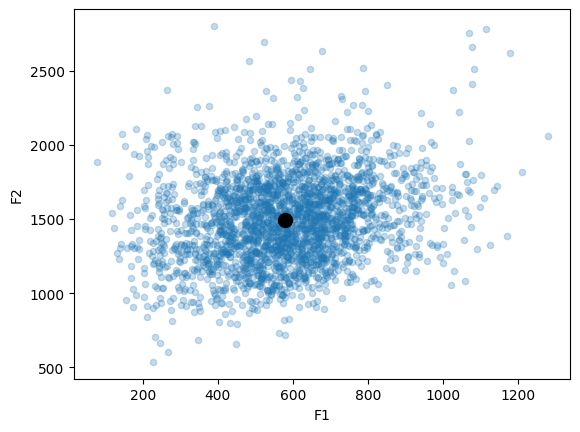

In [3]:
dfFormant = pd.read_csv('FormantCVTrainShort.csv')
dfFormant.query('Vowel=="a"').plot.scatter(x='F1',y='F2', alpha=0.25)
plt.plot(*(dfFormant.query('Vowel=="a"')[['F1','F2']].mean().
           to_numpy()),'ok',markersize=10)

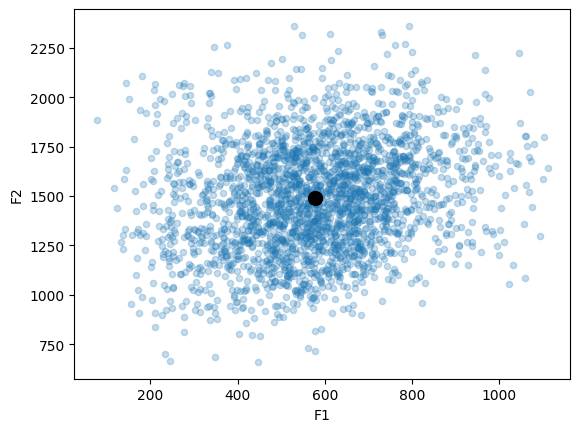

In [4]:
plt.close()
for v in dfFormant['Vowel'].unique():
    i = dfFormant.query(f'Vowel=="{v}"').index
    dfFormant.loc[i,'zF1'] = np.abs(stats.zscore(
        dfFormant.loc[i,'F1']))
    dfFormant.loc[i,'zF2'] = np.abs(stats.zscore(
        dfFormant.loc[i,'F2']))
dfA = dfFormant.query('zF1 < 3 & zF2 < 3 & Vowel=="a"')
dfA.plot.scatter(x='F1',y='F2',alpha=0.25)
plt.plot(*(dfA[['F1','F2']].mean().to_numpy()),'ok',
         markersize=10)

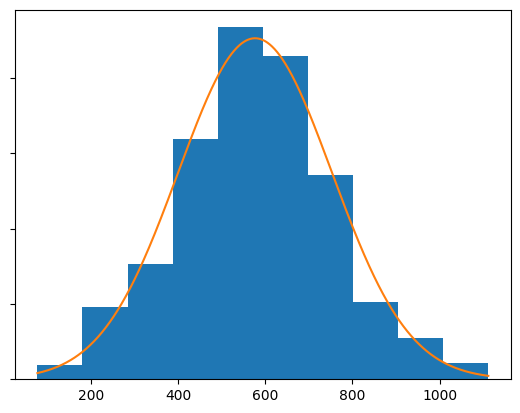

In [5]:
plt.close()
plt.hist(dfA['F1'],density=True)
plt.tick_params(labelleft=False)
x = np.arange(dfA['F1'].min(),dfA['F1'].max())
plt.plot(x,stats.norm.pdf(x=x,loc=dfA['F1'].mean(),
                          scale=dfA['F1'].std()))

章末問題 5)

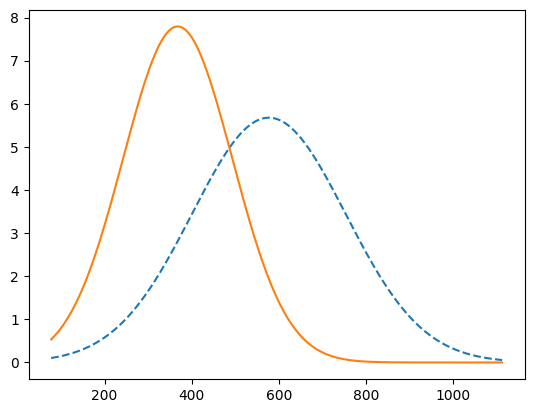

In [6]:
plt.close()
dfI = dfFormant.query('zF1 < 3 & zF2 < 3 & Vowel=="i"')
conditionRange = 'zF1 < 3 & zF2 < 3'
xF1 = np.arange(dfFormant.query(conditionRange)['F1'].min(),
                dfFormant.query(conditionRange)['F1'].max())
plt.plot(x,len(dfA)*stats.norm.pdf(x=x,loc=dfA['F1'].mean(),scale=dfA['F1'].std()),'--')
plt.plot(x,len(dfI)*stats.norm.pdf(x=x,loc=dfI['F1'].mean(),scale=dfI['F1'].std()))
fig = plt.gcf()
fig.savefig('fig07_04.eps')

In [7]:
unknownF1 = 300
likeA = stats.norm.pdf(x=unknownF1,loc=dfA['F1'].mean(),
                       scale=dfA['F1'].std())
likeA

np.float64(0.0006612063982279855)

In [8]:
likeI = stats.norm.pdf(x=unknownF1,loc=dfI['F1'].mean(),
                       scale=dfI['F1'].std())
likeI

np.float64(0.002752478539128989)

(660.137903207859, 2360.4414866306)

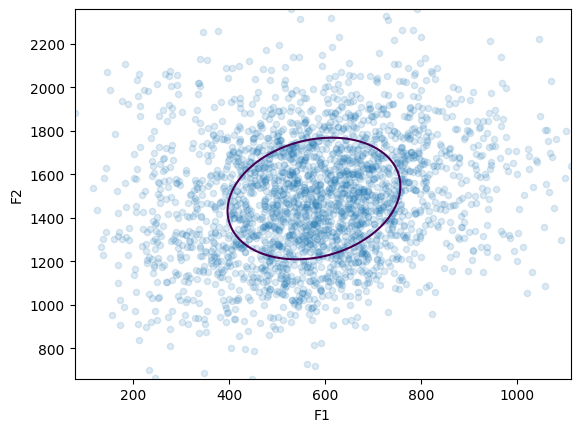

In [9]:
plt.close()
condRange = 'zF1 < 3 & zF2 < 3'
dfA = dfFormant.query(condRange + '& Vowel=="a"')
dfI = dfFormant.query(condRange + '& Vowel=="i"')
#conditionRange = 'zF1 < 3 & zF2 < 3'
xF1 = np.arange(dfFormant.query(condRange)['F1'].min(),
                dfFormant.query(condRange)['F1'].max())
xF2 = np.arange(dfFormant.query(condRange)['F2'].min(),
                dfFormant.query(condRange)['F2'].max())
x, y = np.meshgrid(xF1, xF2)
pos = np.dstack((x,y))
dfA.plot.scatter(x='F1',y='F2',alpha=0.15)
muA = dfA[['F1','F2']].mean()
sigmaA = dfA[['F1','F2']].cov().to_numpy()
plt.contour(xF1, xF2,
            stats.multivariate_normal.pdf(pos, muA, sigmaA),
            [stats.multivariate_normal.
             pdf([muA.iloc[0]+np.sqrt(sigmaA[0,0]),
                  muA.iloc[1]], muA, sigmaA)])
plt.xlim(dfA['F1'].min(), dfA['F1'].max())
plt.ylim(dfA['F2'].min(), dfA['F2'].max())

In [10]:
def getLevel2DMVN(mu, sigma, nLevel):
    level = np.zeros(nLevel+1)
    for n in np.arange(nLevel+1):
        level[n] = stats.multivariate_normal.pdf([mu.iloc[0]+n*np.sqrt(sigma[0,0]),mu.iloc[1]],
                                                 mu, sigma)
    return level

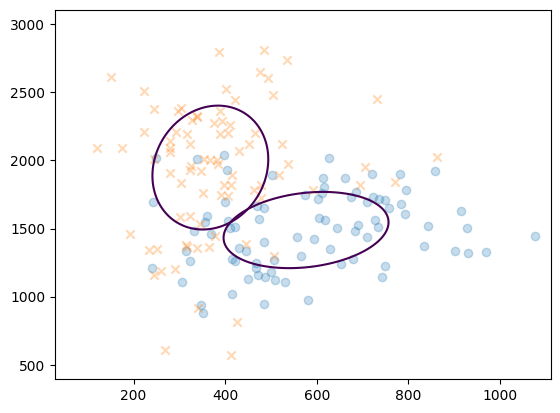

In [11]:
plt.close()
fig, ax = plt.subplots()
dfASample = dfA.sample(frac=1/30)
dfISample = dfI.sample(frac=1/30)
ax.scatter(dfASample['F1'],dfASample['F2'],alpha=0.25)
ax.scatter(dfISample['F1'],dfISample['F2'],marker='x',alpha=0.3)
plt.contour(xF1, xF2,
            stats.multivariate_normal.pdf(pos, dfA[['F1','F2']].mean(),
                                          dfA[['F1','F2']].cov()),
            np.flip(getLevel2DMVN(dfA[['F1','F2']].mean(),
                                  dfA[['F1','F2']].cov().to_numpy(), 1)))
plt.contour(xF1, xF2,
            stats.multivariate_normal.pdf(pos, dfI[['F1','F2']].mean(),
                                          dfI[['F1','F2']].cov()),
            np.flip(getLevel2DMVN(dfI[['F1','F2']].mean(),
                                  dfI[['F1','F2']].cov().to_numpy(), 1)))
fig = plt.gcf()
fig.savefig('fig07_06.pdf')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


(554.452101528001, 3106.65331123467)

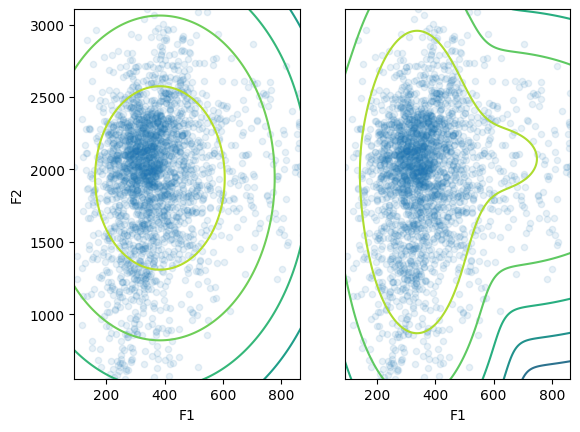

In [12]:
plt.close()
dfIall = dfFormant.query('Vowel=="i"')[['F1','F2']]
gmm1 = GaussianMixture(n_components=1,
                       covariance_type='diag').fit(dfIall)
gmm2 = GaussianMixture(n_components=2,
                       covariance_type='diag').fit(dfIall)
cord = np.reshape(pos, (pos.shape[0]*pos.shape[1],2))
_, axes = plt.subplots(1,2)
xRange=(dfI['F1'].min(), dfI['F1'].max())
yRange=(dfI['F2'].min(), dfI['F2'].max())
dfIall.plot.scatter(x='F1',y='F2', alpha=0.1, ax=axes[0])
plt.subplot(1,2,1)
plt.contour(xF1, xF2, np.reshape(gmm1.score_samples(cord),
                                 (pos.shape[0],pos.shape[1])))
dfIall.plot.scatter(x='F1',y='F2', alpha=0.1, ax=axes[1])
axes[1].set_ylabel(''); axes[1].set_yticks([])
plt.xlim(xRange); plt.ylim(yRange)
plt.subplot(1,2,2)
plt.contour(xF1, xF2, np.reshape(gmm2.score_samples(cord),
                                 (pos.shape[0],pos.shape[1])))
plt.xlim(xRange); plt.ylim(yRange)